Logistic Regression Cross Validation Accuracy: 82.270%
Logistic Regression Test Accuracy: 86.667%
Logistic Regression Test Precision: 83.333%


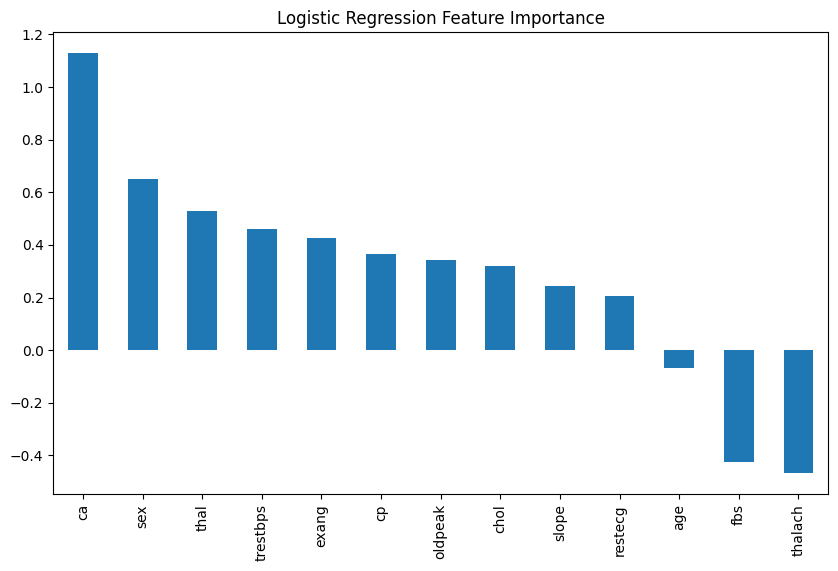

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data = data.astype(float)

data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initialize the model
log_reg = LogisticRegression()

# cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross Validation Accuracy: {cv_scores.mean() * 100:.3f}%')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Logistic Regression Test Accuracy: {accuracy * 100:.3f}%')
print(f'Logistic Regression Test Precision: {precision * 100:.3f}%')

# visualize feature importance
feature_names = X.columns
coef = log_reg.coef_[0]
importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Logistic Regression Feature Importance')
plt.savefig('./images/logistic_regression_feature_importance.png')
plt.show()
